# Download Dataset

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muneebullah123","key":"f56aa5e780bf2b409a6efd2d80cab4cc"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          14932        272  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                                  3KB  2024-03-02 18:50:30           4736         79  0.9411765        
arnavvvvv/spotify-music                                       Top Spotify Songs                                   47KB  2024-03-06 05:20:29           4232         60  1.0              
ravalsmit/customer-segmentation-data                          Customer Segm

In [6]:
!ls

kaggle.json  sample_data


In [7]:
!kaggle datasets download -d amitanshjoshi/spotify-1million-tracks

 95% 73.0M/77.1M [00:00<00:00, 174MB/s]
100% 77.1M/77.1M [00:00<00:00, 168MB/s]


In [8]:
!unzip spotify-1million-tracks.zip

Archive:  spotify-1million-tracks.zip
  inflating: spotify_data.csv        


# Preprocessing

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('spotify_data.csv', index_col=0)

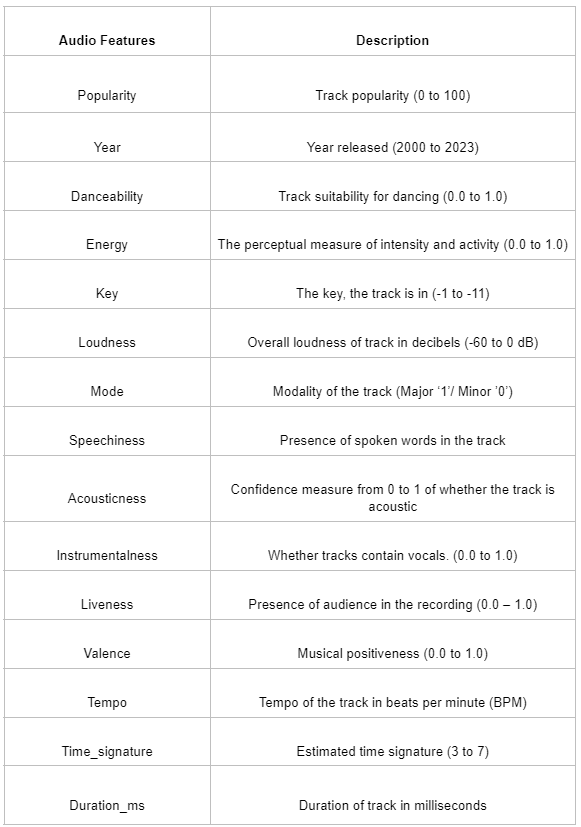

In [11]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [12]:
df.to_csv('spotify_data.csv', index_label=False)

In [13]:
df = pd.read_csv('spotify_data.csv')

In [14]:
df.set_index('track_id', inplace=True)

In [15]:
df

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,,,
53QF56cjZA9RTuuMZDrSA6,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1s8tP3jP4GZcyHDsjvw218,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
7BRCa8MPiyuvr2VU3O9W0F,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
63wsZUhUZLlh1OsyrZq7sz,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
6nXIYClvJAfi6ujLiKqEq8,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0m27F0IGHLGAWhqd6ccYst,Nicola Conte,Black Spirits,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
6er9p611eHEcUCU50j7D57,Nicola Conte,Quiet Dawn,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
7jsMMqxy1tt0rH5FzYcZTQ,Amon Tobin,Morning Ms Candis,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4


In [16]:
df.columns

Index(['artist_name', 'track_name', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [17]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 53QF56cjZA9RTuuMZDrSA6 to 4oMiOwhDZEdBuzAfhzRHbi
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   popularity        1159764 non-null  int64  
 3   year              1159764 non-null  int64  
 4   genre             1159764 non-null  object 
 5   danceability      1159764 non-null  float64
 6   energy            1159764 non-null  float64
 7   key               1159764 non-null  int64  
 8   loudness          1159764 non-null  float64
 9   mode              1159764 non-null  int64  
 10  speechiness       1159764 non-null  float64
 11  acousticness      1159764 non-null  float64
 12  instrumentalness  1159764 non-null  float64
 13  liveness          1159764 non-null  float64
 14  valence           1159764 non-null  float64
 15  tempo             

In [19]:
df.isna().sum()

artist_name         0
track_name          0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [20]:
df.shape

(1159764, 18)

In [21]:
df.nunique(axis=0)

artist_name          64159
track_name          882361
popularity              98
year                    24
genre                   82
danceability          1364
energy                3116
key                     12
loudness             37368
mode                     2
speechiness           1655
acousticness          5398
instrumentalness      5402
liveness              1816
valence               2177
tempo               135697
duration_ms         258021
time_signature           5
dtype: int64

In [22]:
# Useful columns
#  5   danceability      1159764 non-null  float64
#  6   energy            1159764 non-null  float64
#  7   key               1159764 non-null  int64
#  8   loudness          1159764 non-null  float64
#  9   mode              1159764 non-null  int64
#  10  speechiness       1159764 non-null  float64
#  11  acousticness      1159764 non-null  float64
#  12  instrumentalness  1159764 non-null  float64
#  13  liveness          1159764 non-null  float64
#  14  valence           1159764 non-null  float64
#  15  tempo             1159764 non-null  float64
#  16  duration_ms       1159764 non-null  int64
drop_columns = ['artist_name', 'track_name', 'popularity', 'year']

In [23]:
# Extracting the remaining columns that will be our features
useful_columns = [c for c in df.columns if c not in drop_columns]
useful_columns

['genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [24]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [25]:
# Performing Label Encoding for the Genre column since it is only column which is categorical
df['genre'] = label_encoder.fit_transform(df['genre'])
df

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,,,
53QF56cjZA9RTuuMZDrSA6,Jason Mraz,I Won't Give Up,68,2012,0,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1s8tP3jP4GZcyHDsjvw218,Jason Mraz,93 Million Miles,50,2012,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
7BRCa8MPiyuvr2VU3O9W0F,Joshua Hyslop,Do Not Let Me Go,57,2012,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
63wsZUhUZLlh1OsyrZq7sz,Boyce Avenue,Fast Car,58,2012,0,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
6nXIYClvJAfi6ujLiKqEq8,Andrew Belle,Sky's Still Blue,54,2012,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0m27F0IGHLGAWhqd6ccYst,Nicola Conte,Black Spirits,4,2011,81,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
6er9p611eHEcUCU50j7D57,Nicola Conte,Quiet Dawn,3,2011,81,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
7jsMMqxy1tt0rH5FzYcZTQ,Amon Tobin,Morning Ms Candis,2,2011,81,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4


In [26]:
# Extracting features from the dataframe
features = df[useful_columns]
features

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
53QF56cjZA9RTuuMZDrSA6,0,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1s8tP3jP4GZcyHDsjvw218,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
7BRCa8MPiyuvr2VU3O9W0F,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
63wsZUhUZLlh1OsyrZq7sz,0,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
6nXIYClvJAfi6ujLiKqEq8,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0m27F0IGHLGAWhqd6ccYst,81,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
6er9p611eHEcUCU50j7D57,81,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
7jsMMqxy1tt0rH5FzYcZTQ,81,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4


In [27]:
# can contains n track_id where n >= 0
user_track_history = ['53QF56cjZA9RTuuMZDrSA6', '1s8tP3jP4GZcyHDsjvw218', '0m27F0IGHLGAWhqd6ccYst', '53QF56cjZA9RTuuMZDrSA6']

In [28]:
# Filter the dataframe to include only the user's listened songs
user_songs = features.loc[user_track_history]
user_songs

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
53QF56cjZA9RTuuMZDrSA6,0,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1s8tP3jP4GZcyHDsjvw218,0,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4
0m27F0IGHLGAWhqd6ccYst,81,0.373,0.742,10,-6.453,0,0.0736,0.325,0.000141,0.1590,0.522,107.951,344013,3
53QF56cjZA9RTuuMZDrSA6,0,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3


In [29]:
# Drop duplicates in case the user has listened to the same song multiple times
user_songs = user_songs.drop_duplicates()
user_songs

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
53QF56cjZA9RTuuMZDrSA6,0,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1s8tP3jP4GZcyHDsjvw218,0,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4
0m27F0IGHLGAWhqd6ccYst,81,0.373,0.742,10,-6.453,0,0.0736,0.325,0.000141,0.1590,0.522,107.951,344013,3


In [30]:
# Features for user_songs must be same as of features dataframe
user_songs.shape

(3, 14)

In [31]:
# Features for user_songs must be same as of features dataframe
features.shape

(1159764, 14)

# Training

## NearestNeighbors Clustering

In [32]:
from sklearn.neighbors import NearestNeighbors
import joblib

# Initialize and fit the KNN model
k = min(5, len(user_songs))  # Select k as the minimum of 5 or the number of user's listened songs
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(features)

# Save the model to a file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [44]:
import joblib

# Load the saved model
knn_model = joblib.load('knn_model.pkl')

# Find the k-nearest neighbors for the user's songs
distances, indices = knn_model.kneighbors(user_songs)

# Flatten the indices
similar_song_indices = indices.flatten()

# Remove the user's listened songs from the recommendations
recommended_songs = df.iloc[similar_song_indices].drop(user_track_history, errors='ignore')

# Print the recommended songs
recommended_songs[['artist_name', 'track_name']].head(1)

,artist_name,track_name
track_id,,
3UC35PFzfMgxfvngaoFDQx,Thee Commons,Foolish King


## KMeans

In [36]:
from sklearn.cluster import KMeans
import numpy as np

# Initialize and fit the KMeans model
n_clusters = 10  # Number of clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(features)  # Assuming 'features' contains the relevant features for clustering

# Predict cluster labels for the data
cluster_labels = kmeans_model.predict(features)

# Find the cluster indices for each cluster label
cluster_indices = [np.where(cluster_labels == c)[0] for c in range(n_clusters)]

# Save the KMeans model and related information to a dictionary
saved_model = {
    'kmeans_model': kmeans_model,
    'cluster_indices': cluster_indices
}

# Save the dictionary to a file
joblib.dump(saved_model, 'kmeans_model.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['kmeans_model.pkl']

In [43]:
# Load the saved model
saved_model = joblib.load('kmeans_model.pkl')
kmeans_model = saved_model['kmeans_model']
cluster_indices = saved_model['cluster_indices']

# Find the indices of the cluster containing the user's songs
user_cluster_indices = [i for i, indices in enumerate(cluster_indices) if any(idx in indices for idx in similar_song_indices)]

# Combine all songs from the clusters containing the user's songs
recommended_song_indices = [idx for i in user_cluster_indices for idx in cluster_indices[i]]

# Remove the user's listened songs from the recommendations
recommended_songs = df.iloc[recommended_song_indices].drop(user_track_history, errors='ignore')

# Print the recommended songs
recommended_songs[['artist_name', 'track_name']].head(1)

,artist_name,track_name
track_id,,
7KG9zriC6iP8F1CNihtR8Y,Sara Bareilles,Once Upon Another Time
